## Customer Segmentation

Bu ödevimizde dosyamızı okuyoruz,gerekli veri incelemelerini ve hazırlamaları yaptıktan sonra müşteri,sipariş ve ürün diye 3 kategoriye ayırıp csv dosyasına kaydediyoruz.Sqlite ile veri tabanına bağlanıyoruz.Clustering projesi old.için clustering modellerini kullanıyoruz.Sonrada RFM analizi yapıp ödevimizi bitiriyoruz.

RFM nedir?İşte kısaca cevabı RFM (Recency, Frequency, Monetary Value) müşteri segmentasyonunda sıkça kullanılan bir yöntemdir. RFM, müşterilerin son satın alma tarihi, satın alma sıklığı ve satın alma tutarı gibi kriterleri temel alarak müşterileri sınıflandırmak için kullanılır. Kısaca:
Recency (Son Satın Alma Tarihi): Müşterinin son satın alma tarihini ölçer. Son satın alma tarihi ne kadar yakınsa, müşteri o kadar değerlidir.
Frequency (Satın Alma Sıklığı): Müşterinin belirli bir zaman dilimindeki satın alma sayısını ölçer. Daha sık satın alan müşteriler daha değerlidir.
Monetary Value (Satın Alma Tutarı): Müşterinin toplam harcama tutarını ölçer. Daha fazla harcama yapan müşteriler daha değerlidir.
Bu üç faktörün birleşimi, müşterilerin değerini belirlemeye ve işletmelerin onlara uygun stratejiler geliştirmesine yardımcı olur. RFM analizi, etkili müşteri ilişkileri yönetimi ve pazarlama kampanyaları için önemli bir araçtır.

<img src='https://analyticahouse.com/Website/assets/img/Blogs/6314b7a379496.png' width=550>

### Gerekli paketleri aktarıyoruz.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',190)
pd.set_option('display.max_rows',190)

from sklearn.impute import SimpleImputer
#Bu paketle boş olan verileri kısa yoldan ortalamayla(veya median,mode vs)doldurabiliyoruz.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

### Dosyamızı okuyoruz.

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

### EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [3]:
df.head()
#Baştan ilk 5 satırı görüyoruz.

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.sample(5)
#Rastgele 5 satır görüyoruz.

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2002,1667,James,Lemasters,NaN,1444328591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1456953714,0.0,6916,1667,James,Lemasters,NaN,6916,NaN,NaN,NaN,USD,NaN,26.00,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.95,NaN,fedex,11|Ground,NaN,NaN,NaN,2.27195E+13,3.0,1.444329e+09,abe,authorize.net,NaN,35.95,NaN,7596815058,00849R,NaN,1,1444328592,1.444590e+09,1.444403e+09,NaN,Phone order,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8800,6916,27

In [5]:
df.shape
#Datamızda kaç satır ve sütun var onu görüyoruz.

(4194, 181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
df.isnull().sum()
#Boş verilere bakıyoruz.

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [8]:
df.columns = df.columns.str.replace('Customers.', 'c_')
df.columns = df.columns.str.replace('Products.', 'p_')
df.columns = df.columns.str.replace('Orders.', 'o_')
#Sütun isimlerini tekrar düzenliyorum.

In [9]:
df.columns

Index(['c_id', 'c_fname', 'c_lname', 'c_company', 'c_create_date', 'c_status',
       'c_mailing', 'c_reminders', 'c_tax_exempt', 'c_account_id',
       ...
       'p_google_shopping_label', 'p_product_option', 'p_size', 'p_material',
       'p_arm_style', 'p_leg_style', 'p_seat_size', 'p_family_id',
       'p_saved_status', 'p_freight_cost'],
      dtype='object', length=181)

In [10]:
c=df.iloc[:,0:15]
#Sütunları customer,order,product diye ayırmam gerekiyordu.
#df.iloc komutu ile istediğim sütun aralıklarını seçtim sütun seçmek için :, kullandım.(Not:Sadece : olsaydı satır seçmiş olurdum.)

In [11]:
c.head()

,c_id,c_fname,c_lname,c_company,c_create_date,c_status,c_mailing,c_reminders,c_tax_exempt,c_account_id,c_sales_rep,c_rewards,c_profile_id,c_last_modified,c_customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0.0


In [12]:
c.isnull().sum()

c_id                  0
c_fname               0
c_lname               0
c_company          3467
c_create_date         0
c_status           4093
c_mailing          2080
c_reminders        4194
c_tax_exempt       4189
c_account_id       4191
c_sales_rep        4194
c_rewards          4194
c_profile_id       4194
c_last_modified       0
c_customer_type     423
dtype: int64

In [13]:
c['c_customer_type'].mean(), c['c_customer_type'].min(), c['c_customer_type'].max(), c['c_customer_type'].std()
#Bazı sütunlarda boş veri var.Nasıl dolduracağımı bulmak için min,max,ortalama ve std'ye bakıyorum.

(0.1373640944046672, 0.0, 2.0, 0.39184166912165613)

In [14]:
c['c_customer_type']=c['c_customer_type'].fillna(c['c_customer_type'].min())
#Burada min değerle doldurdum.

In [15]:
c=c[['c_id','c_fname','c_lname','c_create_date','c_last_modified','c_customer_type']]
#Customer sütununu tekrar tanımlıyorum.

In [16]:
c.head()

,c_id,c_fname,c_lname,c_create_date,c_last_modified,c_customer_type
0,797,Christy,Dill,1426018724,1437764306,0.0
1,3,John,Smith,1386089139,1437764354,0.0
2,3,John,Smith,1386089139,1437764354,0.0
3,4,James,Anderson,1386780263,1437762646,0.0
4,5,Abraham,Pollak,1386861599,1437764316,0.0


In [17]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   c_id             4194 non-null   int64  
 1   c_fname          4194 non-null   object 
 2   c_lname          4194 non-null   object 
 3   c_create_date    4194 non-null   int64  
 4   c_last_modified  4194 non-null   int64  
 5   c_customer_type  4194 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 196.7+ KB


In [18]:
c.isnull().sum()
#Boş veri kalmış mı diye bakıyorum.

c_id               0
c_fname            0
c_lname            0
c_create_date      0
c_last_modified    0
c_customer_type    0
dtype: int64

In [19]:
customer=c

In [20]:
customer.to_csv('customer.csv')
#Csv dosyasına kaydediyorum.

In [21]:
customer.head()
#Son bir kontrol yapıyorum.Kaydedilen dosyam nasıl diye.

,c_id,c_fname,c_lname,c_create_date,c_last_modified,c_customer_type
0,797,Christy,Dill,1426018724,1437764306,0.0
1,3,John,Smith,1386089139,1437764354,0.0
2,3,John,Smith,1386089139,1437764354,0.0
3,4,James,Anderson,1386780263,1437762646,0.0
4,5,Abraham,Pollak,1386861599,1437764316,0.0


In [22]:
o=df.iloc[:,15:83]
#Orders sütunlarını ayırıyorum.

In [23]:
o.head()

,o_id,o_customer_id,o_fname,o_lname,o_company,o_order_number,o_reorder_id,o_external_source,o_external_id,o_currency,o_sales_rep,o_subtotal,o_tax,o_shipping,o_coupon_id,o_coupon_amount,o_gift_id,o_gift_amount,o_fee_name,o_fee_amount,o_discount_name,o_discount_amount,o_total,o_balance_due,o_shipping_carrier,o_shipping_method,o_shipping_trans,o_shipping_flags,o_weight,o_tracking,o_payment_status,o_payment_date,o_payment_user,o_payment_type,o_payment_method,o_payment_amount,o_purchase_order,o_payment_id,o_payment_code,o_payment_ref,o_status,o_placed_date,o_updated_date,o_shipped_date,o_comments,o_notes,o_registry_id,o_gift_message,o_website,o_mailing,o_flags,o_partial_ship,o_customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [24]:
o.isnull().sum()
#Yine çok fazla boş veri var.

o_id                                0
o_customer_id                       0
o_fname                             0
o_lname                             0
o_company                        3466
o_order_number                      0
o_reorder_id                     4112
o_external_source                3829
o_external_id                    4189
o_currency                          0
o_sales_rep                      4194
o_subtotal                          0
o_tax                             457
o_shipping                        195
o_coupon_id                      3312
o_coupon_amount                  3312
o_gift_id                        4194
o_gift_amount                    4194
o_fee_name                       3967
o_fee_amount                     3916
o_discount_name                  3912
o_discount_amount                3830
o_total                             0
o_balance_due                    3843
o_shipping_carrier                617
o_shipping_method                 443
o_shipping_t

In [25]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   o_id                           4194 non-null   int64  
 1   o_customer_id                  4194 non-null   int64  
 2   o_fname                        4194 non-null   object 
 3   o_lname                        4194 non-null   object 
 4   o_company                      728 non-null    object 
 5   o_order_number                 4194 non-null   object 
 6   o_reorder_id                   82 non-null     float64
 7   o_external_source              365 non-null    object 
 8   o_external_id                  5 non-null      float64
 9   o_currency                     4194 non-null   object 
 10  o_sales_rep                    0 non-null      float64
 11  o_subtotal                     4194 non-null   float64
 12  o_tax                          3737 non-null   f

In [26]:
o.describe().T

,count,mean,std,min,25%,50%,75%,max
o_id,4194.0,9.142984e+03,5.276541e+03,2.300000e+01,4.258000e+03,9.641000e+03,1.401175e+04,1.743700e+04
o_customer_id,4194.0,1.796518e+03,1.065679e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
o_reorder_id,82.0,7.389159e+03,3.818085e+03,3.000000e+01,4.537250e+03,6.887000e+03,1.083200e+04,1.620100e+04
o_external_id,5.0,6.018061e+08,1.342831e+09,6.638000e+01,1.698485e+06,1.698485e+06,1.698485e+06,3.003935e+09
o_sales_rep,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
o_subtotal,4194.0,1.319252e+02,2.311569e+02,2.890000e+00,3.675000e+01,7.474000e+01,1.399600e+02,5.163040e+03
o_tax,3737.0,8.008376e-01,4.859280e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329300e+02
o_shipping,3999.0,7.141263e+00,4.531500e+00,0.000000e+00,0.000000e+00,9.950000e+00,9.950000e+00,3.281000e+01
o_coupon_id,882.0,2.040363e+01,1.185029e+01,4.000000e+00,1.100000e+01,2.600000e+01,3.200000e+01,4.800000e+01
o_coupon_amount,882.0,9.972676e+00,1.461720e+01,0.000000e+00,6.800000e-01,5.000000e+00,1.224500e+01,1.099000e+02


In [27]:
o=o[['o_id','o_customer_id','o_order_number','o_currency','o_subtotal','o_tax','o_shipping','o_total',
     'o_shipping_carrier','o_shipping_method','o_payment_status','o_payment_date','o_payment_type',
     'o_payment_amount','o_payment_id','o_payment_code','o_status','o_placed_date','o_updated_date',
     'o_shipped_date','o_customer_type' ]]

In [28]:
o['o_tax']=o['o_tax'].fillna(o['o_tax'].std())
o['o_shipping']=o['o_shipping'].fillna(o['o_shipping'].std())
#Burada boş verileri std ile doldurdum.

In [29]:
o['o_payment_status']=o['o_payment_status'].fillna(o['o_payment_status'].mean())
o['o_payment_amount']=o['o_payment_amount'].fillna(o['o_payment_amount'].mean())
o['o_payment_date']=o['o_payment_date'].fillna(o['o_payment_date'].mean()).astype('int')
o['o_updated_date']=o['o_updated_date'].fillna(o['o_updated_date'].mean()).astype('int')
o['o_shipped_date']=o['o_shipped_date'].fillna(o['o_shipped_date'].mean()).astype('int')
#Buradaki boş olanları da ortalama değer ile doldurup gerekli olanları int'e çevirdim.

In [30]:
o['o_shipping_carrier'].value_counts()

o_shipping_carrier
fedex     2304
manual    1203
ups         57
NSVA         5
WTVA         2
NDSN         1
INTF         1
MT03         1
HWEP         1
FEDX         1
RDWY         1
Name: count, dtype: int64

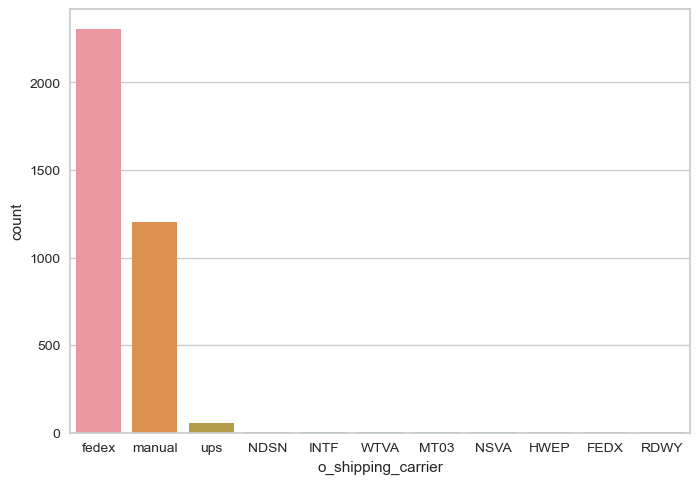

In [31]:
sns.countplot(x=o['o_shipping_carrier']);
#Bir veri görselleştirmesi yapıyorum.En çok hangisi varmış ona bakıyorum.

In [32]:
o['o_shipping_carrier']=o['o_shipping_carrier'].fillna('fedex')
#En çok tekrar edenle doldurdum.Mode ile de doldurabilirdim.Aynı şey olmuş oluyor.

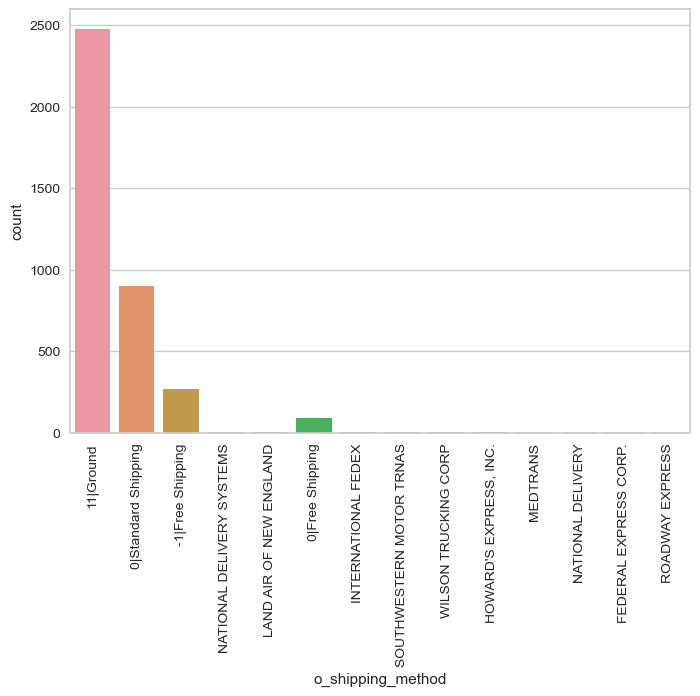

In [33]:
sns.countplot(x=o['o_shipping_method'])
plt.xticks(rotation=90);
#Tekrar bir görselleştirme.

In [34]:
o['o_shipping_method']=o['o_shipping_method'].str.replace("[^\w\s]" , "",regex=True)
o['o_shipping_method']=o['o_shipping_method'].fillna(o['o_shipping_method'].mode()[0])
#Sütunlarda istemediğim birkaç sembol var.Onları kaldırıyorum.Sonra mode ile dolduruyorum.

In [35]:
o['o_payment_type']=o['o_payment_type'].fillna(o['o_payment_type'].mode()[0])

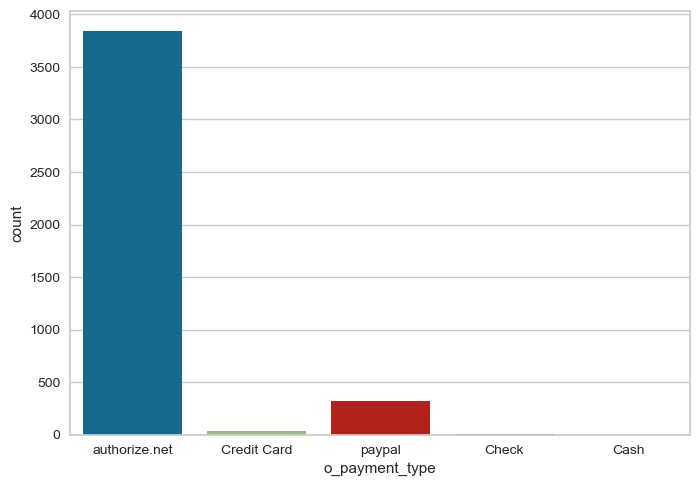

In [36]:
sns.countplot(x=o['o_payment_type']);

In [37]:
o['o_payment_id']=o['o_payment_id'].str.replace("[^\w\s]" , "",regex=True)
o['o_payment_id']=o['o_payment_id'].str.extract('(\d+)').astype('float')
o['o_payment_id']=o['o_payment_id'].fillna(o['o_payment_id'].mean())
#Burada yine istenmeyen yazılar,şekiller vardı.Onları kaldırıp rakamları float yapıyorum.Sonra da ortalama değerle dolduruyorum.

In [38]:
o['o_payment_code']=o['o_payment_code'].str.extract('(\d+)').astype('float')
o['o_payment_code']=o['o_payment_code'].fillna(o['o_payment_code'].mean())

<Axes: xlabel='o_customer_type', ylabel='count'>

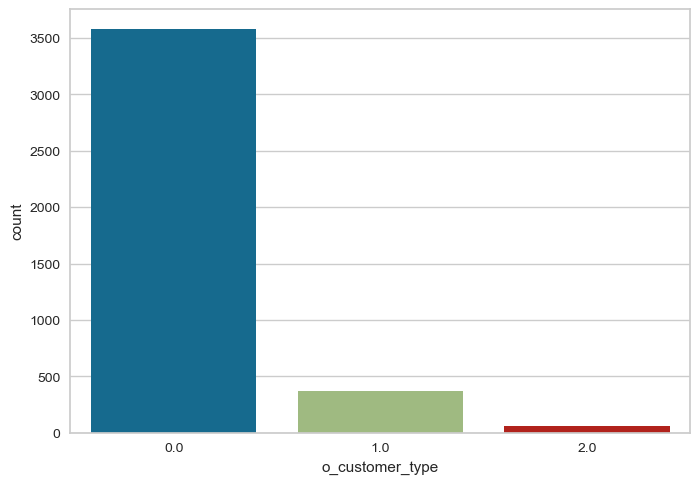

In [39]:
sns.countplot(x=o['o_customer_type'])

In [40]:
o['o_customer_type']=o['o_customer_type'].fillna(o['o_customer_type'].mode()[0])

In [41]:
o.isnull().sum()
#Burası için de artık boş verim kalmadı.

o_id                  0
o_customer_id         0
o_order_number        0
o_currency            0
o_subtotal            0
o_tax                 0
o_shipping            0
o_total               0
o_shipping_carrier    0
o_shipping_method     0
o_payment_status      0
o_payment_date        0
o_payment_type        0
o_payment_amount      0
o_payment_id          0
o_payment_code        0
o_status              0
o_placed_date         0
o_updated_date        0
o_shipped_date        0
o_customer_type       0
dtype: int64

In [42]:
o.shape

(4194, 21)

In [43]:
order=o

In [44]:
order.to_csv('order.csv')
#Csv dosyasına kaydediyorum.

In [45]:
p=df.iloc[:,83:181]

In [46]:
p.head(1)

,p_id,p_status,p_product_type,p_template,p_vendor,p_import_id,p_name,p_display_name,p_menu_name,p_list_price,p_price,p_sale_price,p_cost,p_flags,p_left_flag,p_right_flag,p_last_modified,p_taxable,p_shopping_gtin,p_shopping_brand,p_shopping_mpn,p_shopping_gender,p_shopping_color,p_shopping_age,p_shopping_flags,p_amazon_asin,p_amazon_type,p_amazon_item_type,p_amazon_price,p_google_shopping_id,p_google_shopping_type,p_google_shopping_cat,p_google_adwords,p_shopping_cat,p_shopping_type,p_pricegrabber_cat,p_shopzilla_cat,p_thefind_cat,p_quickbooks_id,p_qb_edit_sequence,p_price_break_type,p_price_breaks,p_short_description,p_long_description,p_websites,p_video,p_audio,p_seo_title,p_seo_description,p_seo_keywords,p_seo_header,p_seo_footer,p_seo_url,p_seo_category,p_unit,p_packaging,p_display_packaging,p_multiple,p_length,p_width,p_height,p_rx,p_latex,p_upc,p_msds_link,p_msds_label,p_lit_link,p_lit_label,p_hcpcs,p_case_qty,p_markup,p_override_markup,p_notes,p_import_flags,p_map_price,p_features_title,p_warranty,p_hygienic,p_default_quantity,p_user_size,p_assembly,p_installation,p_shipping_length,p_shipping_width,p_shipping_height,p_shipping_weight,p_handling_time,p_rotation_link,p_google_shopping_label,p_product_option,p_size,p_material,p_arm_style,p_leg_style,p_seat_size,p_family_id,p_saved_status,p_freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.7,57.64,NaN,44.0,0.0,NaN,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,NaN,Green,NaN,62.0,B00I6GQE0A,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,NaN,NaN,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,NaN,NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.8,7.5,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN


In [47]:
pr=p.select_dtypes(exclude=["object"])
#Object olanlar ile float olanları ayırıyorum.

In [48]:
pr.head()

,p_id,p_status,p_product_type,p_vendor,p_import_id,p_menu_name,p_list_price,p_price,p_sale_price,p_cost,p_flags,p_left_flag,p_right_flag,p_last_modified,p_taxable,p_shopping_gtin,p_shopping_flags,p_amazon_type,p_amazon_price,p_google_adwords,p_shopping_cat,p_shopzilla_cat,p_qb_edit_sequence,p_price_break_type,p_price_breaks,p_websites,p_audio,p_seo_footer,p_seo_category,p_length,p_width,p_height,p_upc,p_case_qty,p_markup,p_override_markup,p_import_flags,p_map_price,p_hygienic,p_default_quantity,p_shipping_length,p_shipping_width,p_shipping_height,p_shipping_weight,p_google_shopping_label,p_leg_style,p_saved_status,p_freight_cost
0,2310.0,0.0,NaN,1.0,3.0,NaN,80.70,57.64,NaN,44.00,0.0,NaN,NaN,1.463163e+09,1.0,1.088440e+13,62.0,NaN,NaN,NaN,NaN,NaN,1.450325e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,136.0,NaN,0.0,NaN,24.80,7.50,30.40,NaN,NaN,NaN,0.0,NaN
1,177.0,1.0,NaN,1.0,3.0,NaN,14.41,10.29,5.0,1.87,65.0,NaN,NaN,1.462370e+09,1.0,1.008020e+13,62.0,NaN,NaN,NaN,199.0,22005.0,1.450322e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,0.0,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,NaN,1.0,3.0,NaN,96.29,68.78,NaN,52.50,32896.0,NaN,NaN,1.463163e+09,1.0,4.008020e+13,62.0,NaN,NaN,NaN,199.0,22005.0,1.450321e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,800.0,NaN,0.0,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,0.0,NaN
3,983.0,0.0,NaN,1.0,3.0,NaN,27.38,19.56,NaN,12.62,0.0,NaN,NaN,1.462595e+09,1.0,NaN,62.0,NaN,NaN,NaN,199.0,22005.0,1.450323e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8.019675e+10,1.0,NaN,0.0,NaN,NaN,NaN,NaN,10.60,7.80,18.50,NaN,NaN,NaN,NaN,NaN
4,991.0,1.0,NaN,1.0,3.0,NaN,50.47,36.05,NaN,25.75,0.0,NaN,NaN,1.462370e+09,1.0,NaN,62.0,NaN,NaN,NaN,199.0,22005.0,1.450323e+09,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,8.50,2.75,12.00,NaN,NaN,NaN,NaN,NaN


In [49]:
toplam=pr.isnull().sum()

In [50]:
outliers=0.8*len(pr)
bos=toplam[toplam>outliers].index
pr=pr.drop(bos, axis=1)
#Bu kod için biraz yardım aldım. :)
#Yukarıda yaptığımız gibi uzun uzun boş verileri silip doldurmaktansa kısayol olarak yüzde 80 boş verileri siliyoruz.

In [51]:
pr.isnull().sum()

p_id                   157
p_status               157
p_vendor               157
p_import_id            157
p_list_price           177
p_price                158
p_sale_price          3034
p_cost                 157
p_flags               1207
p_left_flag           2955
p_last_modified        157
p_taxable             1235
p_shopping_gtin       1064
p_shopping_flags       277
p_shopping_cat        1860
p_shopzilla_cat       1860
p_qb_edit_sequence     466
p_seo_category        1357
p_length              3196
p_width               3198
p_height              3198
p_upc                 2067
p_case_qty            1556
p_override_markup     1274
p_import_flags        1408
p_hygienic            2114
p_shipping_length      196
p_shipping_width       196
p_shipping_height      196
p_saved_status         264
dtype: int64

In [52]:
object_cols =pr.select_dtypes(include='object').columns
float_cols = pr.select_dtypes(include='float').columns
pr_object = pr[object_cols]
pr_float = pr[float_cols]
#Object veri tipinde çalışmadığı için object ve float olanları ayırıyoruz.

In [53]:
imp=SimpleImputer(strategy='mean') 
#Boş verileri ortalama ile dolduracağız.

In [54]:
yeni_p=imp.fit_transform(pr[float_cols])
#Fit transform diyerek ortalama ile dolduruyoruz.Strategy yukarıda vermiştik.

In [55]:
pr=pd.DataFrame(yeni_p, columns=[pr[float_cols].columns])
#Doldurma işlemi yaptıktan sonra tekrar data frame'e çevirmemiz gerekiyor.

In [56]:
pr.head()

,p_id,p_status,p_vendor,p_import_id,p_list_price,p_price,p_sale_price,p_cost,p_flags,p_left_flag,p_last_modified,p_taxable,p_shopping_gtin,p_shopping_flags,p_shopping_cat,p_shopzilla_cat,p_qb_edit_sequence,p_seo_category,p_length,p_width,p_height,p_upc,p_case_qty,p_override_markup,p_import_flags,p_hygienic,p_shipping_length,p_shipping_width,p_shipping_height,p_saved_status
0,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,199.0,22005.0,1.450325e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.0,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000
1,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.0,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336
2,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,199.0,22005.0,1.450321e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,800.0,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000
3,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,8.019675e+10,1.0,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336
4,991.0,1.0,1.0,3.0,50.47,36.05,70.754095,25.75,0.0,5.811138,1.462370e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.0,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336


In [57]:
pr.isnull().sum()
#Artık boş verimiz kalmadı.Kısa yoldan böyle oluyor.Uzun hali örnek olarak yukarıda var. :)

p_id                  0
p_status              0
p_vendor              0
p_import_id           0
p_list_price          0
p_price               0
p_sale_price          0
p_cost                0
p_flags               0
p_left_flag           0
p_last_modified       0
p_taxable             0
p_shopping_gtin       0
p_shopping_flags      0
p_shopping_cat        0
p_shopzilla_cat       0
p_qb_edit_sequence    0
p_seo_category        0
p_length              0
p_width               0
p_height              0
p_upc                 0
p_case_qty            0
p_override_markup     0
p_import_flags        0
p_hygienic            0
p_shipping_length     0
p_shipping_width      0
p_shipping_height     0
p_saved_status        0
dtype: int64

In [58]:
pr.shape

(4194, 30)

In [59]:
product=pr

In [60]:
product.to_csv('product.csv')
#Csv dosyasına kaydediyoruz.

In [61]:
data = pd.concat([customer, order, product], axis=1, ignore_index=False)
#İleride kullanmak için sütunlarımı birleştiriyorum.ignore_index=False diyince sütun isimlerim bozulmadan kalıyor.

In [62]:
data.head()

,c_id,c_fname,c_lname,c_create_date,c_last_modified,c_customer_type,o_id,o_customer_id,o_order_number,o_currency,o_subtotal,o_tax,o_shipping,o_total,o_shipping_carrier,o_shipping_method,o_payment_status,o_payment_date,o_payment_type,o_payment_amount,o_payment_id,o_payment_code,o_status,o_placed_date,o_updated_date,o_shipped_date,o_customer_type,"(p_id,)","(p_status,)","(p_vendor,)","(p_import_id,)","(p_list_price,)","(p_price,)","(p_sale_price,)","(p_cost,)","(p_flags,)","(p_left_flag,)","(p_last_modified,)","(p_taxable,)","(p_shopping_gtin,)","(p_shopping_flags,)","(p_shopping_cat,)","(p_shopzilla_cat,)","(p_qb_edit_sequence,)","(p_seo_category,)","(p_length,)","(p_width,)","(p_height,)","(p_upc,)","(p_case_qty,)","(p_override_markup,)","(p_import_flags,)","(p_hygienic,)","(p_shipping_length,)","(p_shipping_width,)","(p_shipping_height,)","(p_saved_status,)"
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,3758,USD,57.20,0.00000,9.95,64.29,fedex,11Ground,3.0,1426019099,authorize.net,64.29,6.993608e+09,510142.000000,1,1426019099,1438868410,1426100922,0.0,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,199.0,22005.0,1.450325e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.0,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000
1,3,John,Smith,1386089139,1437764354,0.0,23,3,23,USD,20.00,4.85928,9.99,29.99,fedex,11Ground,3.0,1386090455,authorize.net,29.99,0.000000e+00,0.000000,1,1386090455,1440528583,1386102621,0.0,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.0,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,9531,USD,68.78,0.00000,9.95,78.73,manual,0Standard Shipping,3.0,1449603652,authorize.net,78.73,0.000000e+00,0.000000,3,1449603652,1450213487,1442166991,0.0,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,199.0,22005.0,1.450321e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,800.0,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,29,USD,19.56,0.00000,9.95,29.55,fedex,11Ground,3.0,1386780263,authorize.net,29.55,3.285178e+12,132578.056072,1,1386780263,1440528583,1386800132,0.0,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,8.019675e+10,1.0,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336
4,5,Abraham,Pollak,1386861599,1437764316,0.0,30,5,30,USD,36.05,4.85928,9.95,46.00,fedex,11Ground,3.0,1386861599,authorize.net,46.00,3.285178e+12,132578.056072,1,1386861599,1440528583,1386875623,0.0,991.0,1.0,1.0,3.0,50.47,36.05,70.754095,25.75,0.0,5.811138,1.462370e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.0,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336


In [63]:
import sqlite3
from sqlite3 import Error

In [64]:
conn=sqlite3.connect("customer_segmentation.db")
#sqlite veri tabanına bağlanıyoruz.

In [65]:
customer.to_sql("Customers_12", con=conn)
order.to_sql("Orders_12", con=conn)
product.to_sql("Products_12", con=conn)
#Kaydettiğimiz csvleri (dataframe'leri yani)sqlite veri tabanına yazdırıyoruz.
#conn=conn biraz önce açtığımız (customer_segmentation)'a bağlanıp oraya bağlanması için

4194

In [66]:
conn.execute("SELECT * FROM Customers").fetchall()
#Veri tabanındaki customer sütunundan girdiğim bütün verileri görmek için.

[(0, 'Christy', 'Dill', 1426018724, 1437764306, 0.0),
 (1, 'John', 'Smith', 1386089139, 1437764354, 0.0),
 (2, 'John', 'Smith', 1386089139, 1437764354, 0.0),
 (3, 'James', 'Anderson', 1386780263, 1437762646, 0.0),
 (4, 'Abraham', 'Pollak', 1386861599, 1437764316, 0.0),
 (5, 'Abraham', 'Pollak', 1386861599, 1437764316, 0.0),
 (6, 'Abraham', 'Pollak', 1386861599, 1437764316, 0.0),
 (7, 'peggy ', 'thompson', 1388155947, 1437763617, 0.0),
 (8, 'Randy', 'Pruss', 1389303216, 1437763421, 0.0),
 (9, 'Tommy ', 'Smith', 1390509516, 1437763553, 0.0),
 (10, 'Mark', 'Tremble', 1390573155, 1437763644, 0.0),
 (11, 'Emely', 'Cooke', 1390613314, 1437762807, 0.0),
 (12, 'george', 'mcmillin', 1390856039, 1437763265, 0.0),
 (13, 'george', 'mcmillin', 1390856039, 1437763265, 0.0),
 (14, 'george', 'mcmillin', 1390856039, 1437763265, 0.0),
 (15, 'adrian', 'Cavitt', 1391012017, 1437762774, 0.0),
 (16, 'Sharon', 'Mueller', 1391362873, 1437763316, 0.0),
 (17, 'Norrell', 'Nelson', 1395348641, 1437763333, 0.0),
 

In [67]:
c=pd.read_sql("Select * from Customers_12", con=conn)
o=pd.read_sql("Select * from Orders_12", con=conn)
p=pd.read_sql("Select * from Products_12", con=conn)
#Veri tabanına kaydettiğim sütunları çağırıyorum.Conn bağlantısını kullanarak customer_segmentation'a bağlansın diyorum.

In [68]:
conn.close()
#Bağlantıyı kapatıyoruz.

In [69]:
o.head()

,index,o_id,o_customer_id,o_order_number,o_currency,o_subtotal,o_tax,o_shipping,o_total,o_shipping_carrier,o_shipping_method,o_payment_status,o_payment_date,o_payment_type,o_payment_amount,o_payment_id,o_payment_code,o_status,o_placed_date,o_updated_date,o_shipped_date,o_customer_type
0,0,3758,797,3758,USD,57.20,0.00000,9.95,64.29,fedex,11Ground,3.0,1426019099,authorize.net,64.29,6.993608e+09,510142.000000,1,1426019099,1438868410,1426100922,0.0
1,1,23,3,23,USD,20.00,4.85928,9.99,29.99,fedex,11Ground,3.0,1386090455,authorize.net,29.99,0.000000e+00,0.000000,1,1386090455,1440528583,1386102621,0.0
2,2,9531,3,9531,USD,68.78,0.00000,9.95,78.73,manual,0Standard Shipping,3.0,1449603652,authorize.net,78.73,0.000000e+00,0.000000,3,1449603652,1450213487,1442166991,0.0
3,3,29,4,29,USD,19.56,0.00000,9.95,29.55,fedex,11Ground,3.0,1386780263,authorize.net,29.55,3.285178e+12,132578.056072,1,1386780263,1440528583,1386800132,0.0
4,4,30,5,30,USD,36.05,4.85928,9.95,46.00,fedex,11Ground,3.0,1386861599,authorize.net,46.00,3.285178e+12,132578.056072,1,1386861599,1440528583,1386875623,0.0


In [70]:
import datetime as dt
now=pd.to_datetime('2023-08-28')
print(now)

2023-08-28 00:00:00


In [71]:
o["o_payment_date"]=pd.to_datetime(o["o_payment_date"])
o["o_placed_date"]=pd.to_datetime(o["o_placed_date"])
o["o_updated_date"]=pd.to_datetime(o["o_updated_date"])
#Tarihle alakalı olan sütunlarımı date time'a çeviriyorum.

In [72]:
rfm=o.loc[:,["o_customer_id","o_id","o_payment_amount","o_placed_date"]]
#Gerekli olan sütunları alıyorum.

In [73]:
rfm.isnull().sum()

o_customer_id       0
o_id                0
o_payment_amount    0
o_placed_date       0
dtype: int64

In [74]:
rfm.groupby("o_customer_id")["o_placed_date"].max()
#Bu kodu her müşteri için en son sipariş tarihini bulmak için kullanılıyoruz.

o_customer_id
3      1970-01-01 00:00:01.449603652
4      1970-01-01 00:00:01.386780263
5      1970-01-01 00:00:01.410363655
7      1970-01-01 00:00:01.388155947
8      1970-01-01 00:00:01.389303216
                    ...             
3730   1970-01-01 00:00:01.463408854
3732   1970-01-01 00:00:01.463412757
3733   1970-01-01 00:00:01.463413246
3735   1970-01-01 00:00:01.463416694
3736   1970-01-01 00:00:01.463418095
Name: o_placed_date, Length: 3054, dtype: datetime64[ns]

In [75]:
o.columns

Index(['index', 'o_id', 'o_customer_id', 'o_order_number', 'o_currency',
       'o_subtotal', 'o_tax', 'o_shipping', 'o_total', 'o_shipping_carrier',
       'o_shipping_method', 'o_payment_status', 'o_payment_date',
       'o_payment_type', 'o_payment_amount', 'o_payment_id', 'o_payment_code',
       'o_status', 'o_placed_date', 'o_updated_date', 'o_shipped_date',
       'o_customer_type'],
      dtype='object')

In [76]:
new_rfm=rfm.groupby("o_customer_id").agg({"o_id": "count","o_payment_amount": "sum",  "o_placed_date":"max"})
#o_id(order_id) count'a eşitliyoruz.Her müşteri için kaç adet sipariş verildiğini sayar.
#o_payment_amount'u sum'a eşitliyoruz.Her müşteri için verilen siparişlerin toplam parasal değeri bulacak.
#o_placed_date max'e eşitliyoruz.Her müşteri için en son sipariş tarihini bulur.

In [77]:
new_rfm["Recency"]=(now - new_rfm["o_placed_date"]).dt.days
#Şimdiki zaman olarak verdiğim tarihle müşterilerin en son sipariş verdiği tarihi çıkarıyor.Onu recency'e eşitliyor.

In [78]:
new_rfm

,o_id,o_payment_amount,o_placed_date,Recency
o_customer_id,,,,
3,2,108.720000,1970-01-01 00:00:01.449603652,19596
4,1,29.550000,1970-01-01 00:00:01.386780263,19596
5,3,205.422263,1970-01-01 00:00:01.410363655,19596
7,1,49.140000,1970-01-01 00:00:01.388155947,19596
8,1,69.700000,1970-01-01 00:00:01.389303216,19596
...,...,...,...,...
3730,1,16.060000,1970-01-01 00:00:01.463408854,19596
3732,1,39.990000,1970-01-01 00:00:01.463412757,19596
3733,1,989.100000,1970-01-01 00:00:01.463413246,19596


In [83]:
new_rfm.columns=["frequency", "monetary", "date", "recency"]
#Sütunları tekrar isimlendiriyorum.

In [85]:
new_rfm.drop("date", axis=1, inplace=True)
#Date sütununu siliyoruz.Silmezsek modeli tahmin ederken hata veriyor.

In [86]:
new_rfm.head()

,frequency,monetary,recency
o_customer_id,,,
3,2,108.720000,19596
4,1,29.550000,19596
5,3,205.422263,19596
7,1,49.140000,19596
8,1,69.700000,19596


In [87]:
model=KMeans(n_clusters=4) 
#Clusteringe göre modelleme yapıyorum.

In [88]:
model=model.fit(new_rfm)
#rfm'e göre modeli eğitiyorum.

In [89]:
pred=model.predict(new_rfm)
#tahmin ettiriyorum.

In [90]:
new_rfm["cluster"]=pred

In [91]:
new_rfm.head()

,frequency,monetary,recency,cluster
o_customer_id,,,,
3,2,108.720000,19596,1
4,1,29.550000,19596,1
5,3,205.422263,19596,1
7,1,49.140000,19596,1
8,1,69.700000,19596,1


In [92]:
silhouette_score(new_rfm,pred)

0.8735887810830649

In [93]:
def clust(clusters):
    for no_of_cluster in np.arrange(1, clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(new_rfm)
        pred=model.predict(new_rfm)
        score=silhouette_score(new_rfm,pred)
        print("Number of Cluster {}, silhouette{}". format(no_of_cluster, score))

In [94]:
clust=new_rfm.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([1, 1, 1, ..., 0, 1, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


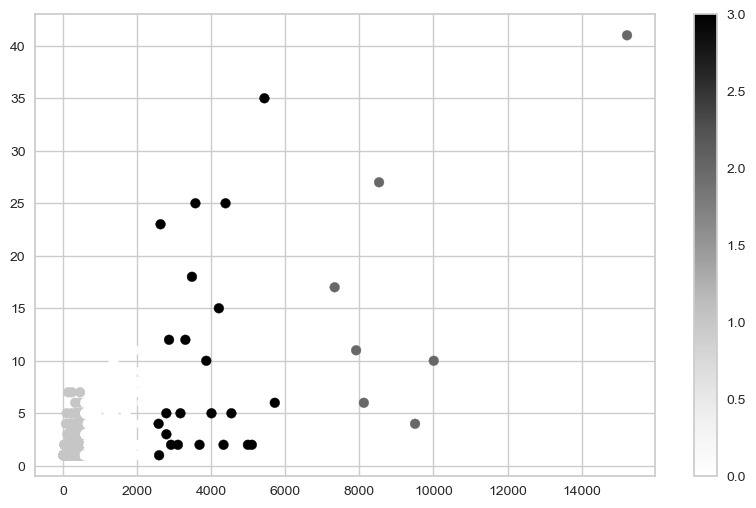

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(new_rfm.monetary, new_rfm.frequency, c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [96]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(new_rfm)
        pred=model.predict(new_rfm)
        score=silhouette_score(new_rfm,pred)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [97]:
clust(10)

Cluster  2  score:  0.964336473854272
Cluster  3  score:  0.9420322412123469
Cluster  4  score:  0.8735887810830649
Cluster  5  score:  0.8736911800565585
Cluster  6  score:  0.813563299140431
Cluster  7  score:  0.7025922225711387
Cluster  8  score:  0.6801817757885862
Cluster  9  score:  0.6578628463132097
Cluster  10  score:  0.6368427584566231


In [98]:
model=KMeans()

In [99]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

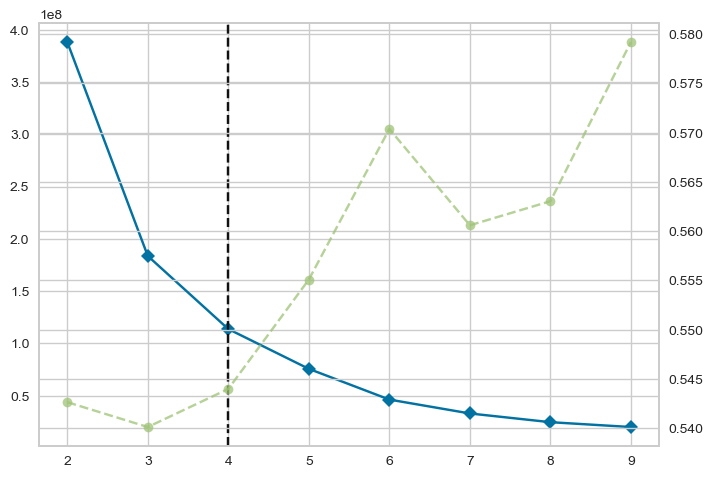

In [100]:
visualizer.fit(new_rfm)